In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data/train_u6lujuX_CVtuZ9i.csv")

In [3]:
df_2 = pd.read_csv("data/test_Y3wMUE5_7gLdaTN.csv")

## **1. EXPLORE THE DATA TO GAIN INSIGHTS**

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [7]:
df.isnull().sum() / len(df) * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

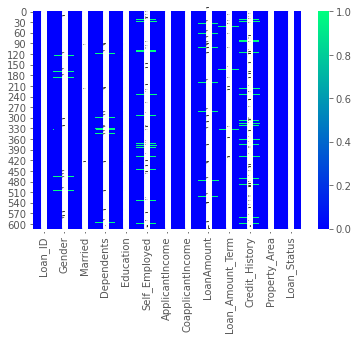

In [8]:
sns.heatmap(df.isnull(), annot = True, cmap = "winter")
plt.show()

Change some variables' data type to make it easier to visualize

In [9]:
df["ApplicantIncome"] = df["ApplicantIncome"].astype("float64")
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].astype("object")
df["Credit_History"] = df["Credit_History"].astype("object")

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [11]:
df.describe(include = "object")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,600.0,564.0,614,614
unique,614,2,2,4,2,2,10.0,2.0,3,2
top,LP001594,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,Y
freq,1,489,398,345,480,500,512.0,475.0,233,422


Let's check out our data for each variables:
1. Most of our customers in Male
2. Most of our customers have been married
3. Most of our customers don't have depedents
4. Most of our customers have graduated
5. Most of our customers worked for someone
6. Most of our customers choose 360 days
7. Most of our customers have credit history
8. Our customers spread evenly in different area
9. Most of our customers get loan
10. Most of our customers income is around 3000 - 5500
11. Most of our co-customers income amouts is around 1500 - 3000
12. Most of our customers loan amouts is around 100 - 180

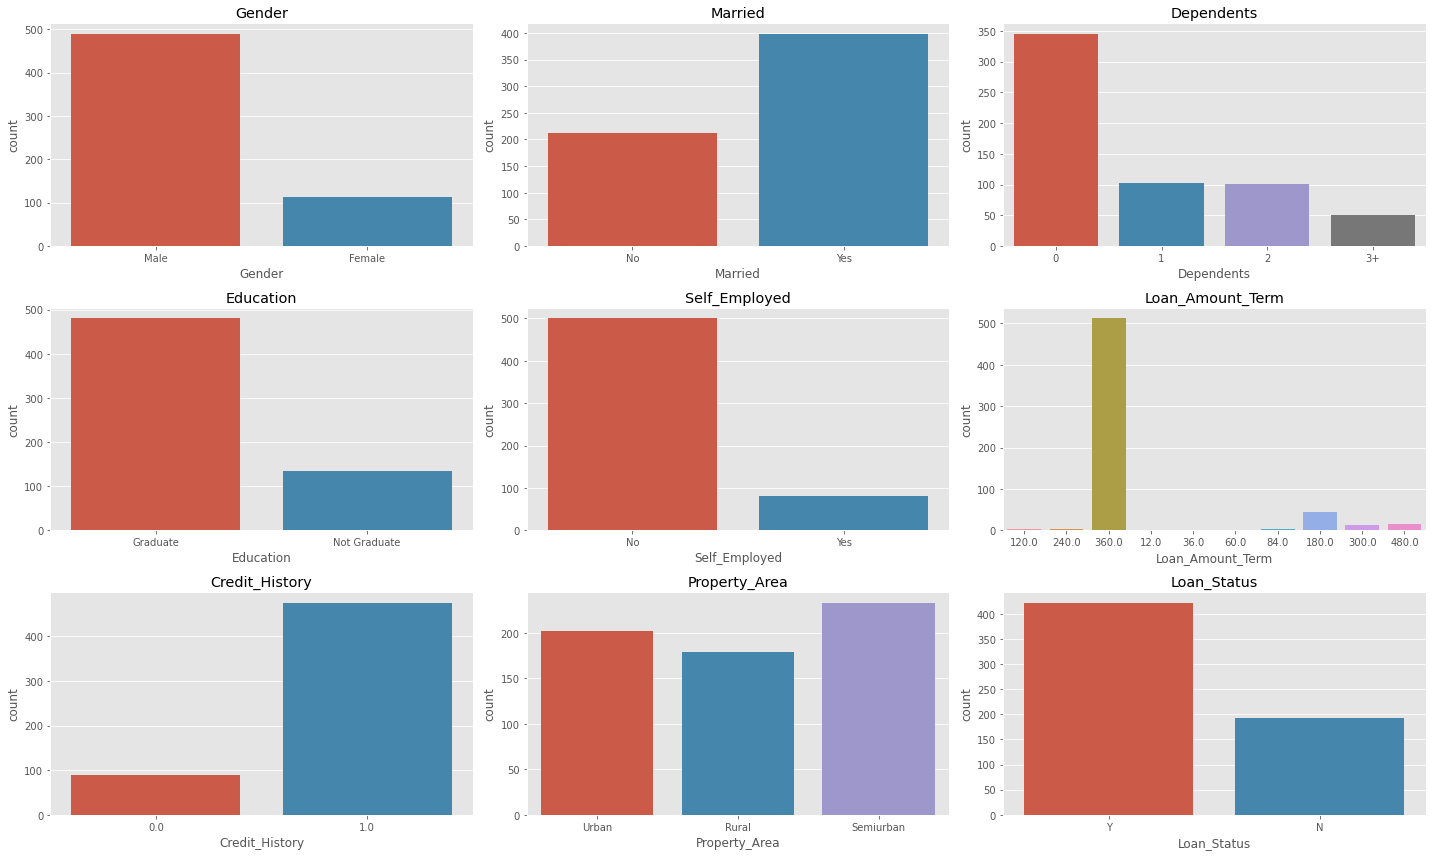

In [12]:
columns = df.select_dtypes(include = "object").columns[1:]
fig, ax = plt.subplots(3, 3, figsize = (20, 12))
for row in range(3):
    for col in range(3):
        sns.countplot(df[columns[(row * 3) + col]], ax = ax[row, col])
        ax[row, col].set_title(columns[(row * 3) + col])
plt.tight_layout()
plt.show()

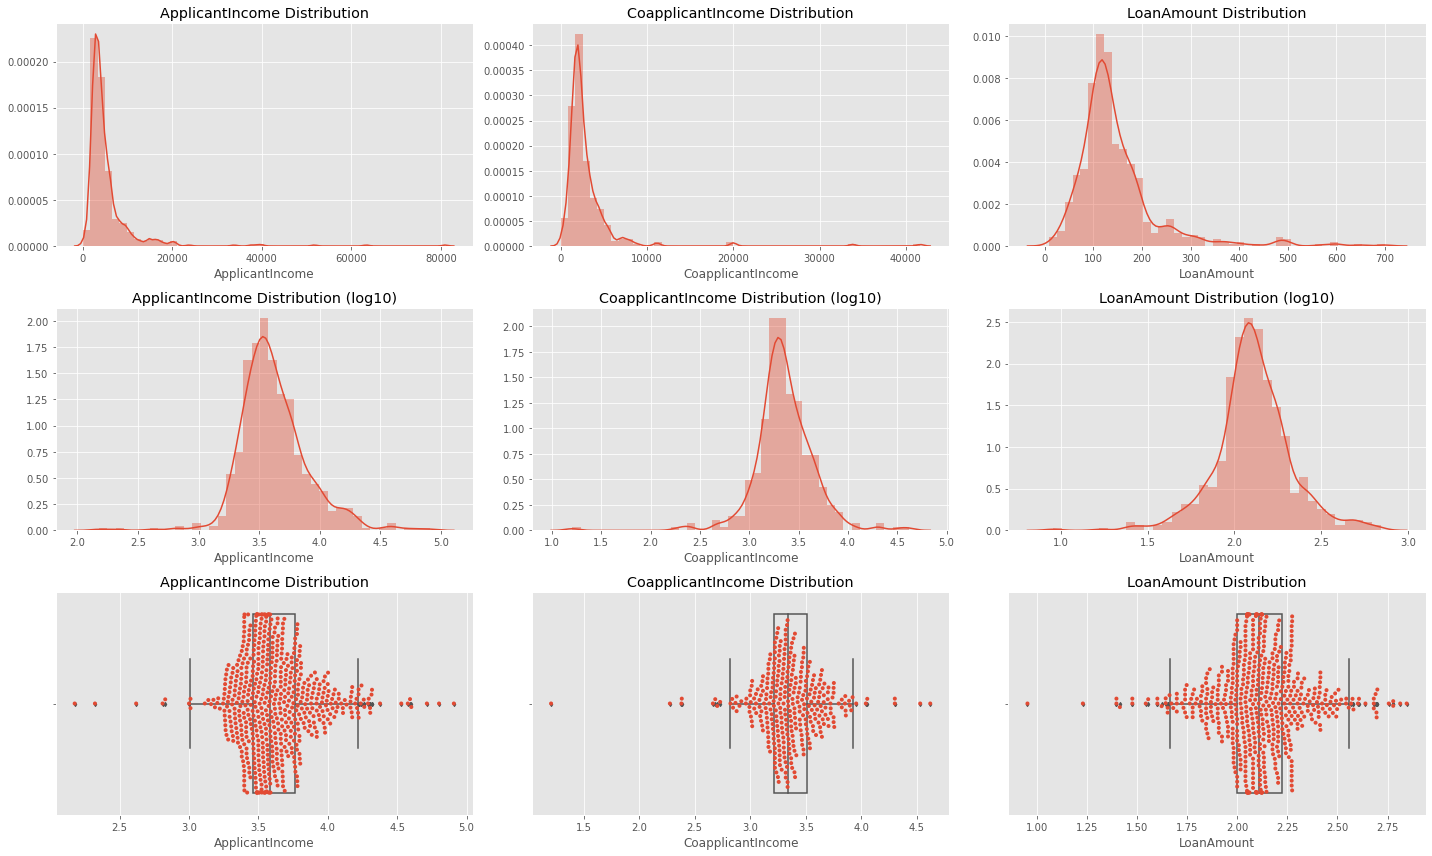

In [13]:
columns = df.select_dtypes(include = ["int64", "float64"]).columns
fig, ax = plt.subplots(3, 3, figsize = (20, 12))
for col in range(3):
    sns.distplot(df[(df[columns[col]].notnull()) & (df[columns[col]] != 0)][columns[col]], ax = ax[0, col])
    sns.distplot(np.log10(df[(df[columns[col]].notnull()) & (df[columns[col]] != 0)][columns[col]]), ax = ax[1, col])
    sns.boxplot(np.log10(df[(df[columns[col]].notnull()) & (df[columns[col]] != 0)][columns[col]]), fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[2, col])
    sns.swarmplot(np.log10(df[(df[columns[col]].notnull()) & (df[columns[col]] != 0)][columns[col]]), size = 4, ax = ax[2, col])
    ax[0, col].set_title(columns[col] + " Distribution")
    ax[1, col].set_title(columns[col] + " Distribution (log10)")
    ax[2, col].set_title(columns[col] + " Distribution")
plt.tight_layout()
plt.show()

Let's check out correlation between each variable and our target

There is positive correlation between our customer income with their loan amount. Higher income tend to take higher loan amount.

In [14]:
df["pct_from_tot_income"] = df["LoanAmount"] / (df["ApplicantIncome"] + df["CoapplicantIncome"])

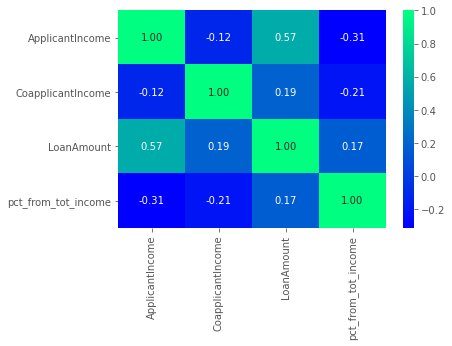

In [15]:
sns.heatmap(df.corr(), annot = True, fmt= ".2f", cmap = "winter")
plt.show()

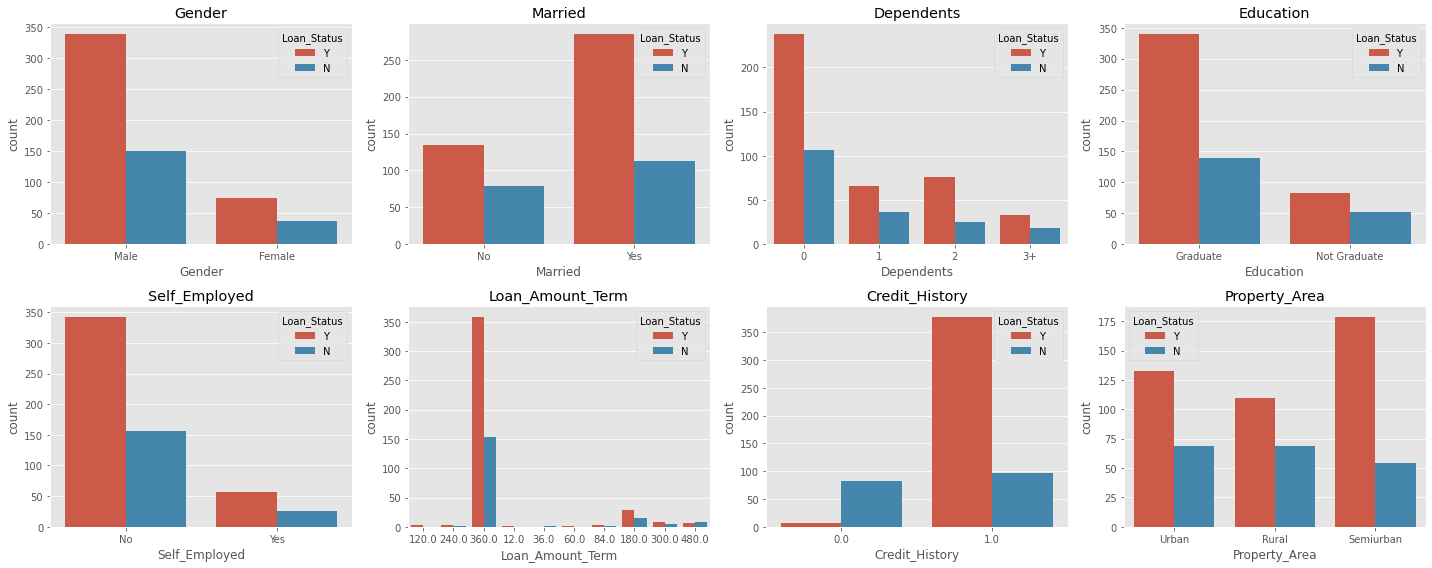

In [16]:
columns = df.select_dtypes(include = "object").columns[1:-1]
fig, ax = plt.subplots(2, 4, figsize = (20, 8))
for row in range(2):
    for col in range(4):
        sns.countplot(df[columns[(row * 4) + col]], hue = df["Loan_Status"], ax = ax[row, col])
        ax[row, col].set_title(columns[(row * 4) + col])
plt.tight_layout()
plt.show()
fig.savefig('data_distribution_loan_status.png')

If wee look at data distribution for customer income, co-customer income and amount of loan, it's hard to define which one is more affect to decide if our customers can get the loan or not.

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


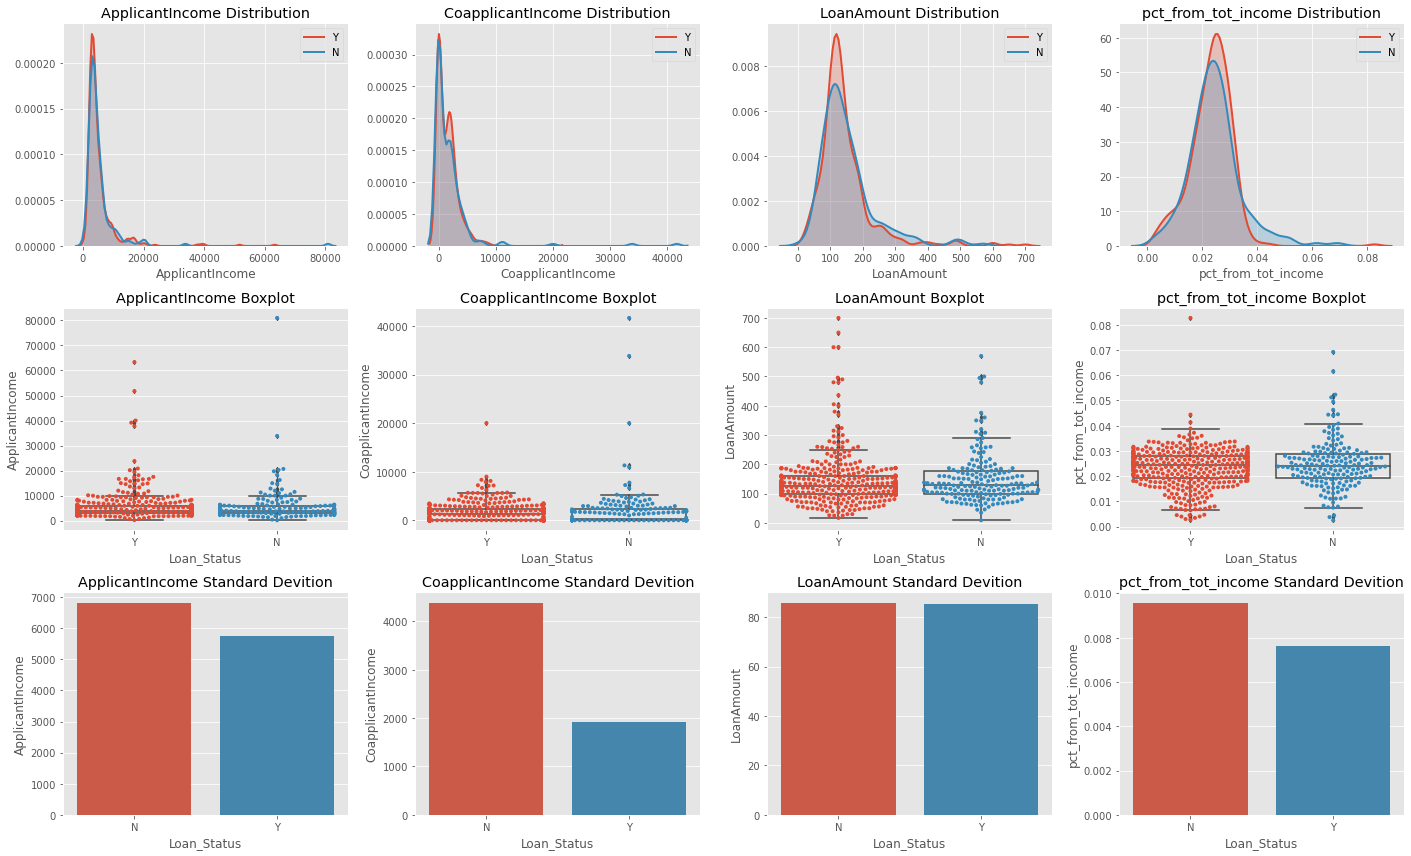

In [17]:
fig, ax = plt.subplots(3, 4, figsize = (20, 12))
columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "pct_from_tot_income"]
for col in range(len(columns)):
    sns.distplot(df[df["Loan_Status"] == "Y"][columns[col]], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Y", ax = ax[0, col])
    sns.distplot(df[df["Loan_Status"] == "N"][columns[col]], hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "N", ax = ax[0, col])
    sns.boxplot(x = "Loan_Status", y = columns[col], data = df, fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Loan_Status", y = columns[col], data = df, size = 4, ax = ax[1, col])
    sns.barplot(x = "Loan_Status", y = columns[col], data = df.groupby("Loan_Status").std().reset_index(), ax = ax[2, col])
    ax[0, col].set_title(columns[col] + " Distribution")
    ax[1, col].set_title(columns[col] + " Boxplot")
    ax[2, col].set_title(columns[col] + " Standard Devition")
plt.tight_layout()
plt.show()

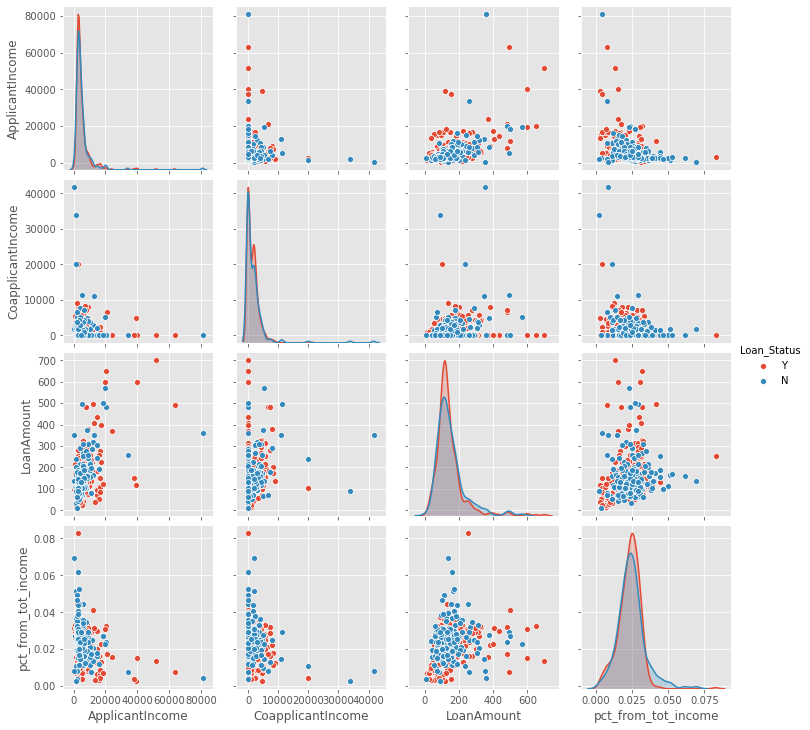

In [18]:
sns.pairplot(df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "pct_from_tot_income", "Loan_Status"]], hue = "Loan_Status")
plt.show()

Let's take look if gender can determine loan status

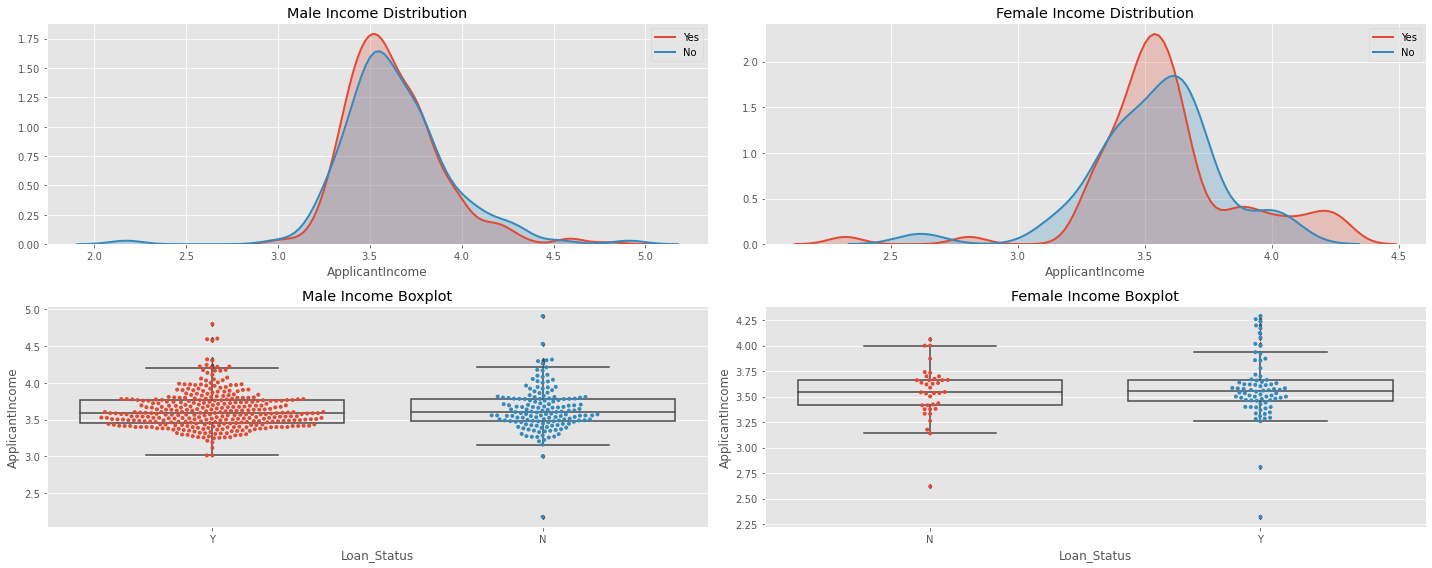

In [19]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
columns = ["Male", "Female"]
for col in range(len(columns)):
    sns.distplot(np.log10(df[(df["Loan_Status"] == "Y") & (df["Gender"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Yes", ax = ax[0, col])
    sns.distplot(np.log10(df[(df["Loan_Status"] == "N") & (df["Gender"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "No", ax = ax[0, col])
    sns.boxplot(x = "Loan_Status", y = np.log10(df[df["Gender"] == columns[col]]["ApplicantIncome"]), data = df[df["Gender"] == columns[col]], fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Loan_Status", y = np.log10(df[df["Gender"] == columns[col]]["ApplicantIncome"]), data = df[df["Gender"] == columns[col]], size = 4, ax = ax[1, col])
    ax[0, col].set_title(columns[col] + " Income Distribution")
    ax[1, col].set_title(columns[col] + " Income Boxplot")
plt.tight_layout()
plt.show()

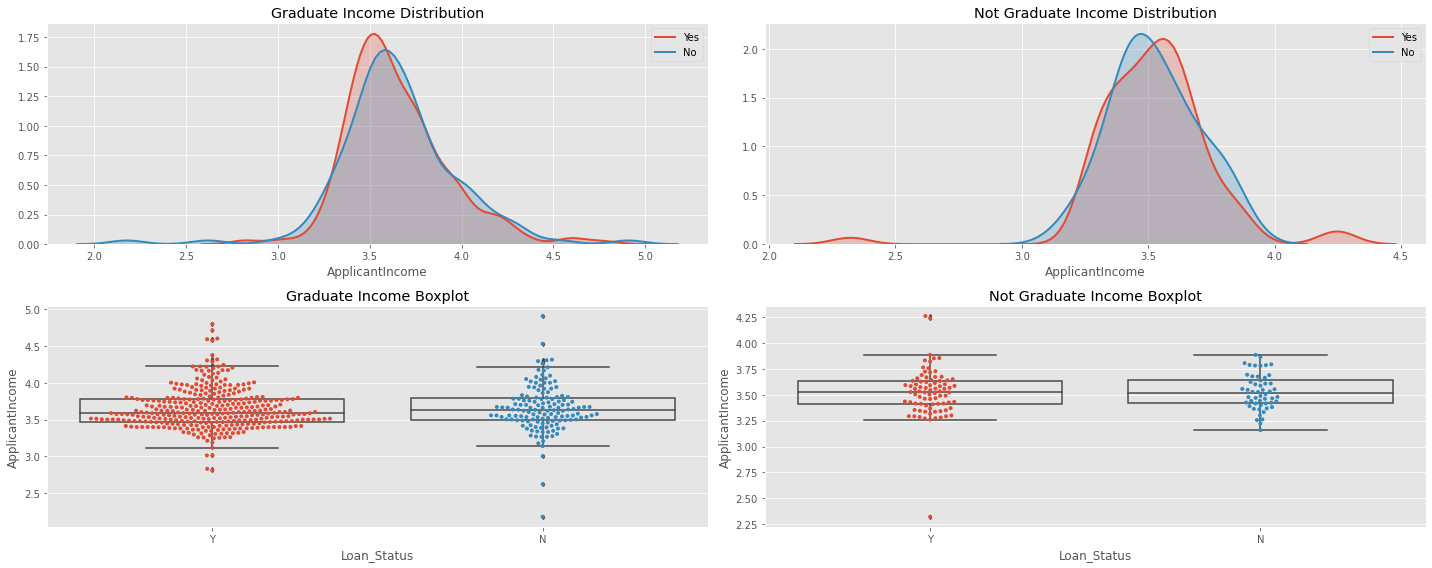

In [20]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
columns = ["Graduate", "Not Graduate"]
for col in range(len(columns)):
    sns.distplot(np.log10(df[(df["Loan_Status"] == "Y") & (df["Education"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Yes", ax = ax[0, col])
    sns.distplot(np.log10(df[(df["Loan_Status"] == "N") & (df["Education"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "No", ax = ax[0, col])
    sns.boxplot(x = "Loan_Status", y = np.log10(df[df["Education"] == columns[col]]["ApplicantIncome"]), data = df[df["Education"] == columns[col]], fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Loan_Status", y = np.log10(df[df["Education"] == columns[col]]["ApplicantIncome"]), data = df[df["Education"] == columns[col]], size = 4, ax = ax[1, col])
    ax[0, col].set_title(columns[col] + " Income Distribution")
    ax[1, col].set_title(columns[col] + " Income Boxplot")
plt.tight_layout()
plt.show()

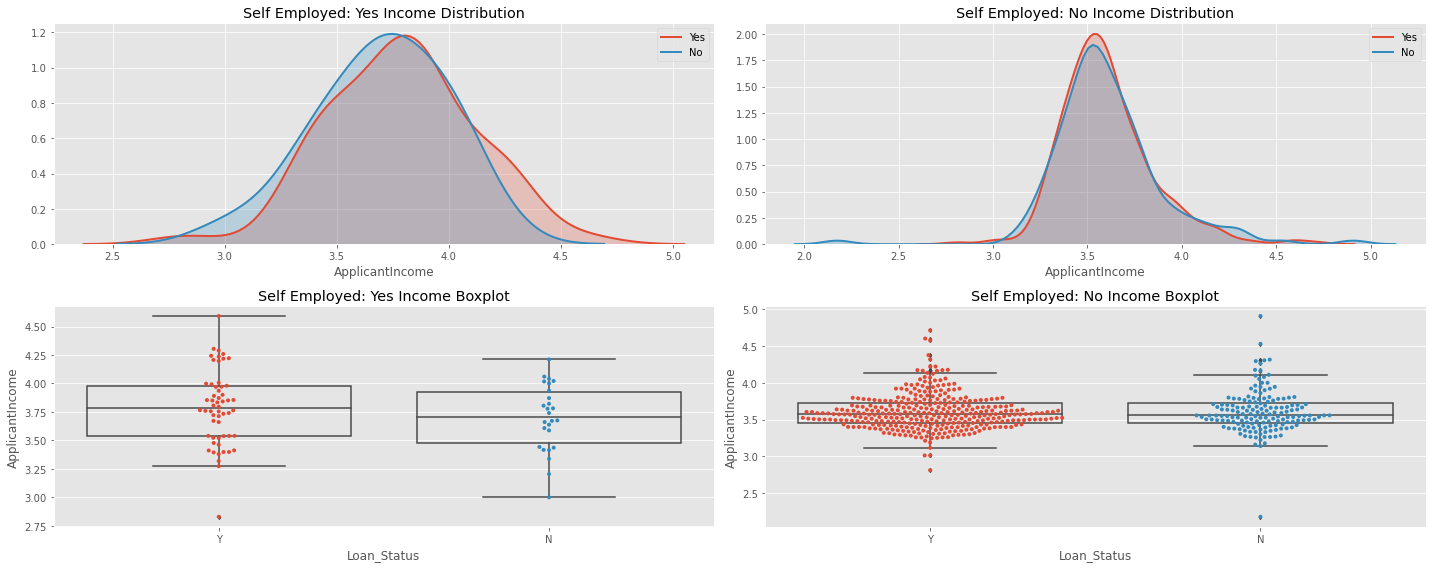

In [21]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
columns = ["Yes", "No"]
for col in range(len(columns)):
    sns.distplot(np.log10(df[(df["Loan_Status"] == "Y") & (df["Self_Employed"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Yes", ax = ax[0, col])
    sns.distplot(np.log10(df[(df["Loan_Status"] == "N") & (df["Self_Employed"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "No", ax = ax[0, col])
    sns.boxplot(x = "Loan_Status", y = np.log10(df[df["Self_Employed"] == columns[col]]["ApplicantIncome"]), data = df[df["Self_Employed"] == columns[col]], fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Loan_Status", y = np.log10(df[df["Self_Employed"] == columns[col]]["ApplicantIncome"]), data = df[df["Self_Employed"] == columns[col]], size = 4, ax = ax[1, col])
    ax[0, col].set_title("Self Employed: " + columns[col] + " Income Distribution")
    ax[1, col].set_title("Self Employed: " + columns[col] + " Income Boxplot")
plt.tight_layout()
plt.show()

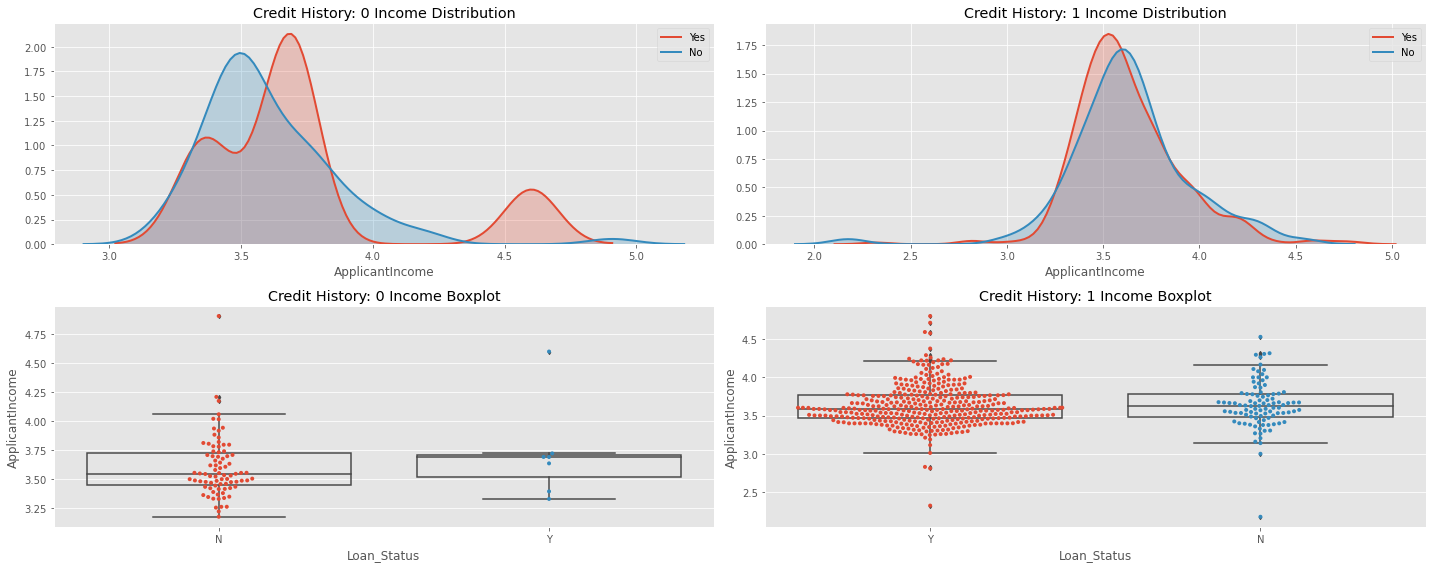

In [22]:
fig, ax = plt.subplots(2, 2, figsize = (20, 8))
columns = [0, 1]
for col in range(len(columns)):
    sns.distplot(np.log10(df[(df["Loan_Status"] == "Y") & (df["Credit_History"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Yes", ax = ax[0, col])
    sns.distplot(np.log10(df[(df["Loan_Status"] == "N") & (df["Credit_History"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "No", ax = ax[0, col])
    sns.boxplot(x = "Loan_Status", y = np.log10(df[df["Credit_History"] == columns[col]]["ApplicantIncome"]), data = df[df["Credit_History"] == columns[col]], fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Loan_Status", y = np.log10(df[df["Credit_History"] == columns[col]]["ApplicantIncome"]), data = df[df["Credit_History"] == columns[col]], size = 4, ax = ax[1, col])
    ax[0, col].set_title("Credit History: " + str(columns[col]) + " Income Distribution")
    ax[1, col].set_title("Credit History: " + str(columns[col]) + " Income Boxplot")
plt.tight_layout()
plt.show()

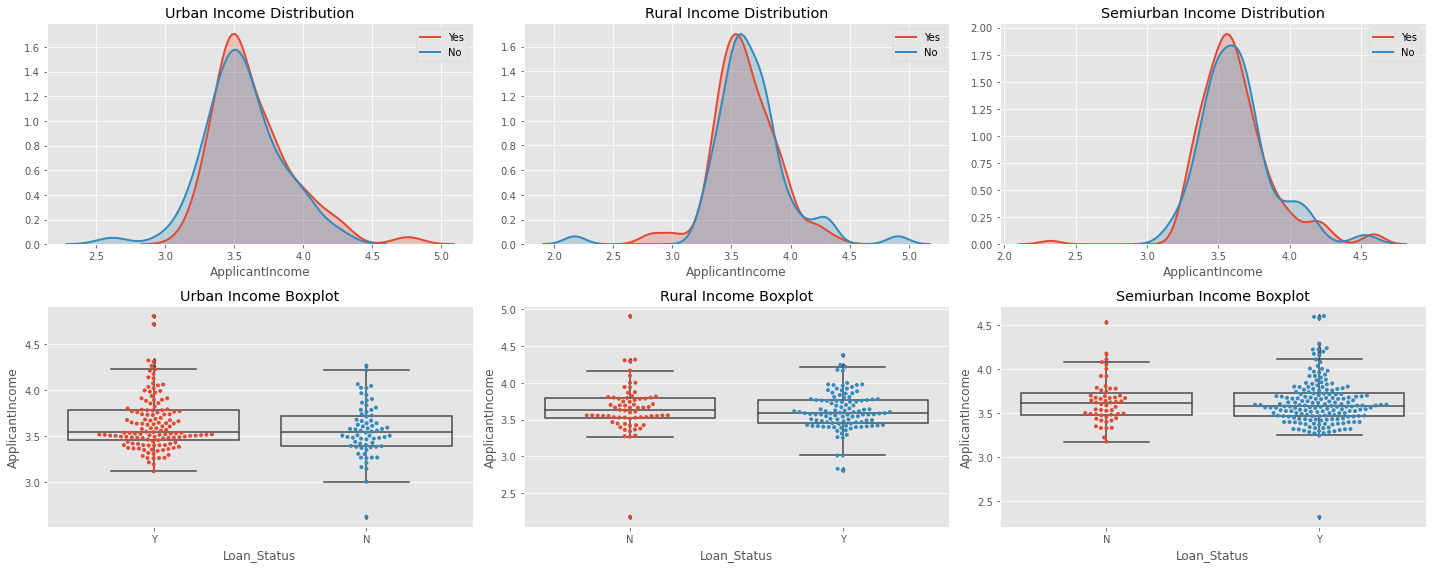

In [23]:
fig, ax = plt.subplots(2, 3, figsize = (20, 8))
columns = ["Urban", "Rural", "Semiurban"]
for col in range(len(columns)):
    sns.distplot(np.log10(df[(df["Loan_Status"] == "Y") & (df["Property_Area"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "Yes", ax = ax[0, col])
    sns.distplot(np.log10(df[(df["Loan_Status"] == "N") & (df["Property_Area"] == columns[col])]["ApplicantIncome"]),
                 hist = False, kde_kws = {'shade': True, 'linewidth': 2}, label = "No", ax = ax[0, col])
    sns.boxplot(x = "Loan_Status", y = np.log10(df[df["Property_Area"] == columns[col]]["ApplicantIncome"]), data = df[df["Property_Area"] == columns[col]], fliersize = 3, boxprops={'facecolor':'None'}, ax = ax[1, col])
    sns.swarmplot(x = "Loan_Status", y = np.log10(df[df["Property_Area"] == columns[col]]["ApplicantIncome"]), data = df[df["Property_Area"] == columns[col]], size = 4, ax = ax[1, col])
    ax[0, col].set_title(columns[col] + " Income Distribution")
    ax[1, col].set_title(columns[col] + " Income Boxplot")
plt.tight_layout()
plt.show()

## **2. PREPARE THE DATA**

### DATA CLEANING

In this section, we need to deal with outliers and missing values

In [24]:
df.isnull().sum() / len(df) * 100

Loan_ID                0.000000
Gender                 2.117264
Married                0.488599
Dependents             2.442997
Education              0.000000
Self_Employed          5.211726
ApplicantIncome        0.000000
CoapplicantIncome      0.000000
LoanAmount             3.583062
Loan_Amount_Term       2.280130
Credit_History         8.143322
Property_Area          0.000000
Loan_Status            0.000000
pct_from_tot_income    3.583062
dtype: float64

In [25]:
columns = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]
for col in columns:
    p_25 = np.percentile(df[df[col].notnull()][col], 25)
    p_75 = np.percentile(df[df[col].notnull()][col], 75)
    IQR = p_75 - p_25
    df = df[df[col] <= p_75 + 1.5 * IQR]

For gender, we will fill na values with Male because most of our customers are Male.
For married status, we will fill na values with Yes because most of our customers are married.

In [26]:
df["Gender"].fillna("Male", inplace = True)
df["Married"].fillna("Yes", inplace = True)
df["Dependents"].fillna(0, inplace = True)
df["Self_Employed"].fillna("No", inplace = True)

In [27]:
data_fillna = df[["LoanAmount", "Loan_Amount_Term", "Credit_History", "Loan_Status"]].groupby("Loan_Status").agg({"LoanAmount": "median", "Loan_Amount_Term": pd.Series.mode, "Credit_History": pd.Series.mode}).reset_index()

In [28]:
df = pd.merge(df, data_fillna, on = "Loan_Status")

In [29]:
df["LoanAmount"] = df.apply(lambda x: x["LoanAmount_y"] if np.isnan(x["LoanAmount_x"]) else x["LoanAmount_x"], axis = 1)
df["Loan_Amount_Term"] = df.apply(lambda x: x["Loan_Amount_Term_y"] if np.isnan(x["Loan_Amount_Term_x"]) else x["Loan_Amount_Term_x"], axis = 1)
df["Credit_History"] = df.apply(lambda x: x["Credit_History_y"] if np.isnan(x["Credit_History_x"]) else x["Credit_History_x"], axis = 1)

In [30]:
df = df.drop(["LoanAmount_x", "LoanAmount_y", "Loan_Amount_Term_x", "Loan_Amount_Term_y", "Credit_History_x", "Credit_History_y"], axis = 1)

In [31]:
df["pct_from_tot_income"] = df["LoanAmount"] / (df["ApplicantIncome"] + df["CoapplicantIncome"])

### FEATURE SELECTION

In [32]:
import statsmodels.api as sm

In [33]:
data_check = df.copy()

In [34]:
data_check = data_check.drop("Loan_ID", axis = 1)
columns = data_check.select_dtypes(include = "object").columns
for col in columns:
    data_check = pd.concat([data_check, pd.get_dummies(data_check[col], drop_first = True, prefix = col)], axis = 1)
    data_check = data_check.drop(col, axis = 1)

In [35]:
logit_mod = sm.Logit(data_check["Loan_Status_Y"], data_check.drop(["Loan_Status_Y", "Dependents_2", "Dependents_3+", "Dependents_0", "Gender_Male", "Self_Employed_Yes", "Property_Area_Urban", "Loan_Amount_Term", "Education_Not Graduate", "Married_Yes", "Dependents_1"], axis = 1))
logit_res = logit_mod.fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [36]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:          Loan_Status_Y   No. Observations:                  503
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            5
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:                     inf
Time:                        23:13:58   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ApplicantIncome            -0.0004      0.000     -3.804      0.000      -0.001      -0.000
CoapplicantIncome          -0.0003      0.000     -2.009      0.045      -0.001   -6.26e-06


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


### FEATURE SCALING

In [37]:
X = data_check.drop(["Loan_Status_Y", "Dependents_2", "Dependents_3+", "Dependents_0", "Gender_Male", "Self_Employed_Yes", "Property_Area_Urban", "Loan_Amount_Term", "Education_Not Graduate", "Married_Yes", "Dependents_1"], axis = 1).values
y = data_check["Loan_Status_Y"].values

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **3. EXPLORE MANY DIFFERENT MODELS**

In [42]:
# Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, plot_confusion_matrix, roc_curve, precision_recall_curve

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingClassifier

In [43]:
algorithm = {
    'Logistic Regression': LogisticRegression(solver = "saga", max_iter = 2000),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

In [44]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [45]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                 })

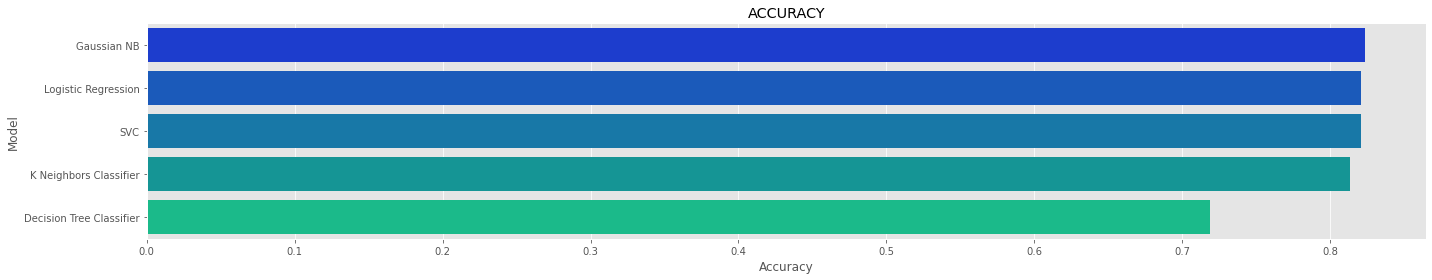

In [46]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
plt.figure(figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'winter')
plt.title("ACCURACY")
plt.tight_layout()
plt.show()

In [47]:
results

,Model,Accuracy,Accuracy Std
0,Logistic Regression,0.8209,0.0348
1,K Neighbors Classifier,0.8134,0.0564
2,SVC,0.8209,0.0348
3,Gaussian NB,0.8234,0.0408
4,Decision Tree Classifier,0.7188,0.0754


**LOGISTIC REGRESSION**

In [48]:
lr = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000)
parameters = {"C": np.linspace(0.2, 1, 5), "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(lr, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=5000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='accuracy')

In [49]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002795,0.001073,0.000698,0.000457,0.2,0,"{'C': 0.2, 'l1_ratio': 0.0}",0.829268,0.804878,0.8,...,0.823204,0.81768,0.823204,0.81768,0.825967,0.823204,0.823204,0.812155,0.820896,0.003852


In [50]:
lr = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 0.2, l1_ratio = 0)
lr.fit(X_train, y_train)

LogisticRegression(C=0.2, l1_ratio=0, max_iter=5000, penalty='elasticnet',
                   solver='saga')

              precision    recall  f1-score   support

           0       0.92      0.45      0.60       122
           1       0.80      0.98      0.88       280

    accuracy                           0.82       402
   macro avg       0.86      0.72      0.74       402
weighted avg       0.84      0.82      0.80       402



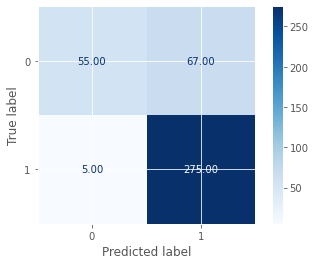

In [51]:
y_pred = lr.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(lr, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**KNN**

In [52]:
knn = KNeighborsClassifier()
parameters = {"p": [1, 2], "n_neighbors": list(range(1, 21)), "leaf_size": np.linspace(20, 40, 21)}
gscv = GridSearchCV(knn, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40.]),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'p': [1, 2]},
             scoring='accuracy')

In [53]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
419,0.001294,7.744416e-04,0.003789,0.001466,30,10,2,"{'leaf_size': 30.0, 'n_neighbors': 10, 'p': 2}",0.853659,0.829268,...,0.9,0.725,0.85,0.825,0.8,0.85,0.9,0.833293,0.04889,1
499,0.000898,2.994664e-04,0.002791,0.000399,32,10,2,"{'leaf_size': 32.0, 'n_neighbors': 10, 'p': 2}",0.853659,0.829268,...,0.9,0.725,0.85,0.825,0.8,0.85,0.9,0.833293,0.04889,1
59,0.001297,4.572841e-04,0.002992,0.000623,21,10,2,"{'leaf_size': 21.0, 'n_neighbors': 10, 'p': 2}",0.853659,0.829268,...,0.9,0.725,0.85,0.825,0.8,0.85,0.9,0.833293,0.04889,1
459,0.000997,3.693565e-07,0.002590,0.000487,31,10,2,"{'leaf_size': 31.0, 'n_neighbors': 10, 'p': 2}",0.853659,0.829268,...,0.9,0.725,0.85,0.825,0.8,0.85,0.9,0.833293,0.04889,1
819,0.000794,3.968955e-04,0.003094,0.000536,40,10,2,"{'leaf_size': 40.0, 'n_neighbors': 10, 'p': 2}",0.853659,0.829268,...,0.9,0.725,0.85,0.825,0.8,0.85,0.9,0.833293,0.04889,1


In [54]:
knn = KNeighborsClassifier(n_neighbors = 10, leaf_size = 30, p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

              precision    recall  f1-score   support

           0       0.89      0.55      0.68       122
           1       0.83      0.97      0.90       280

    accuracy                           0.84       402
   macro avg       0.86      0.76      0.79       402
weighted avg       0.85      0.84      0.83       402



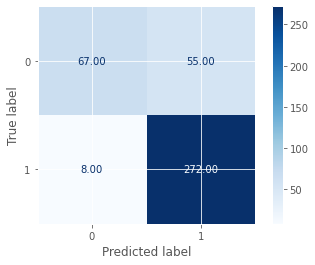

In [55]:
y_pred = knn.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(knn, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SVC**

In [56]:
svc = SVC()
parameters = {"C": [1, 2, 3], "kernel": ("linear", "poly", "rbf", "sigmoid")}
gscv = GridSearchCV(svc, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 2, 3],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [57]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003887,0.001220,0.001098,0.000694,1,linear,"{'C': 1, 'kernel': 'linear'}",0.829268,0.804878,0.8,0.85,0.8,0.85,0.775,0.8,0.8,0.9,0.820915,0.03483,1
1,0.025531,0.009034,0.000798,0.000399,1,poly,"{'C': 1, 'kernel': 'poly'}",0.829268,0.804878,0.8,0.85,0.8,0.85,0.775,0.8,0.8,0.9,0.820915,0.03483,1
2,0.008478,0.001744,0.000997,0.000631,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.829268,0.804878,0.8,0.85,0.8,0.85,0.775,0.8,0.8,0.9,0.820915,0.03483,1
4,0.002096,0.000299,0.000397,0.000486,2,linear,"{'C': 2, 'kernel': 'linear'}",0.829268,0.804878,0.8,0.85,0.8,0.85,0.775,0.8,0.8,0.9,0.820915,0.03483,1
5,0.045782,0.022576,0.000597,0.000487,2,poly,"{'C': 2, 'kernel': 'poly'}",0.829268,0.804878,0.8,0.85,0.8,0.85,0.775,0.8,0.8,0.9,0.820915,0.03483,1


In [58]:
svc = SVC(C = 1, kernel = "linear")
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

              precision    recall  f1-score   support

           0       0.92      0.45      0.60       122
           1       0.80      0.98      0.88       280

    accuracy                           0.82       402
   macro avg       0.86      0.72      0.74       402
weighted avg       0.84      0.82      0.80       402



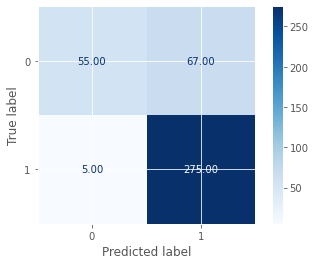

In [59]:
y_pred = svc.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(svc, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**GAUSSIAN NB**

In [60]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.92      0.48      0.63       122
           1       0.81      0.98      0.89       280

    accuracy                           0.83       402
   macro avg       0.87      0.73      0.76       402
weighted avg       0.84      0.83      0.81       402



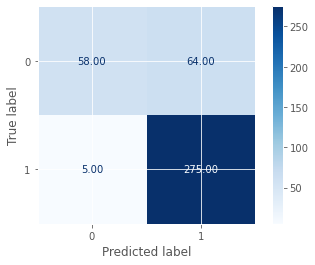

In [61]:
y_pred = gnb.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(gnb, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**DECISION TREE**

In [62]:
dct = DecisionTreeClassifier()
parameters = {"criterion": ("gini", "entropy"), "max_depth": list(range(1, 11)), "min_samples_split": list(range(2, 11)), "min_samples_leaf": list(range(1, 11))}
gscv = GridSearchCV(dct, param_grid = parameters, cv = 10, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [63]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
250,0.000899,2.997739e-04,0.000299,0.000457,gini,3,8,9,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.829268,...,0.8,0.825,0.85,0.825,0.8,0.85,0.9,0.830915,0.028633,1
338,0.000997,3.370483e-06,0.000699,0.000458,gini,4,8,7,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.829268,...,0.8,0.825,0.85,0.825,0.8,0.85,0.9,0.830915,0.028633,1
339,0.000997,6.991805e-07,0.000000,0.000000,gini,4,8,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.829268,...,0.8,0.825,0.85,0.825,0.8,0.85,0.9,0.830915,0.028633,1
340,0.001097,2.993666e-04,0.000000,0.000000,gini,4,8,9,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.829268,...,0.8,0.825,0.85,0.825,0.8,0.85,0.9,0.830915,0.028633,1
341,0.001197,3.986839e-04,0.000399,0.000488,gini,4,8,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.829268,...,0.8,0.825,0.85,0.825,0.8,0.85,0.9,0.830915,0.028633,1


In [64]:
dct = DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 8, min_samples_split = 9)
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=9)

              precision    recall  f1-score   support

           0       0.89      0.51      0.65       122
           1       0.82      0.97      0.89       280

    accuracy                           0.83       402
   macro avg       0.85      0.74      0.77       402
weighted avg       0.84      0.83      0.82       402



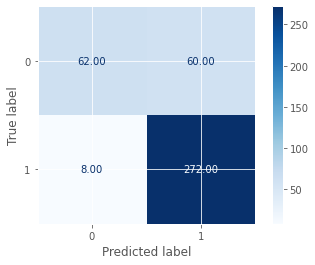

In [65]:
y_pred = dct.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(dct, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**FINAL CHECK**

In [66]:
algorithm = {
    'Logistic Regression': LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 0.2, l1_ratio = 0),
    'K Neighbors Classifier': KNeighborsClassifier(n_neighbors = 10, leaf_size = 30, p = 2),
    'SVC': SVC(C = 1, kernel = "linear"),
    'Gaussian NB': GaussianNB(),
    'Decision Tree Classifier': DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 8, min_samples_split = 9)
}

In [67]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [68]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                 })

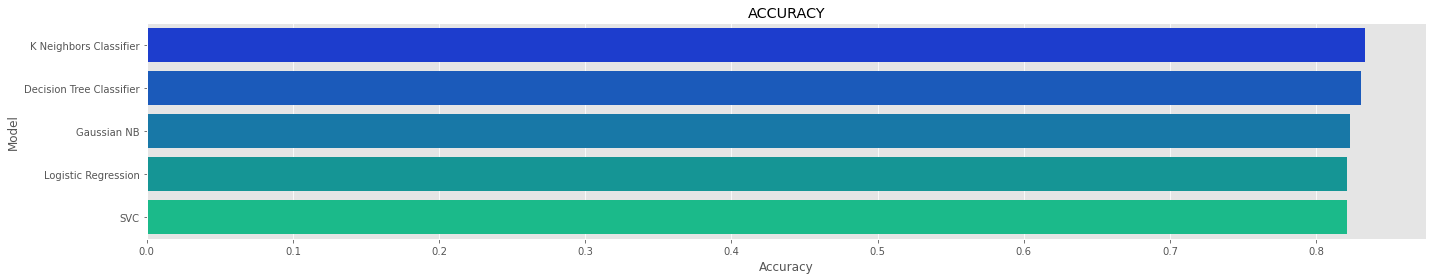

In [69]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
plt.figure(figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'winter')
plt.title("ACCURACY")
plt.tight_layout()
plt.show()

In [70]:
results

,Model,Accuracy,Accuracy Std
0,Logistic Regression,0.8209,0.0348
1,K Neighbors Classifier,0.8333,0.0489
2,SVC,0.8209,0.0348
3,Gaussian NB,0.8234,0.0408
4,Decision Tree Classifier,0.8309,0.0286


**ENSEMBLE - VOTING**

In [71]:
clf1 = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 5000, C = 0.2, l1_ratio = 0)
clf2 = KNeighborsClassifier(n_neighbors = 10, leaf_size = 30, p = 2)
clf3 = SVC(C = 1, kernel = "linear")
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 8, min_samples_split = 9)
eclf = VotingClassifier(estimators=[("lr", clf1), ("knn", clf2), ("svc", clf3), ("gnb", clf4), ("dct", clf5)], voting='hard')
eclf = eclf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.92      0.46      0.61       122
           1       0.81      0.98      0.89       280

    accuracy                           0.82       402
   macro avg       0.86      0.72      0.75       402
weighted avg       0.84      0.82      0.80       402



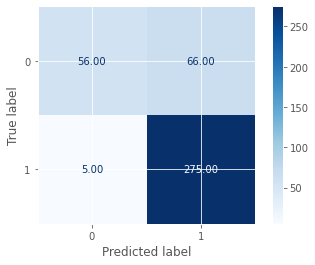

In [72]:
y_pred = eclf.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(eclf, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()